## move zero to the end
> 將所有的 0 移到最後面

In [30]:
sample = [1, 2, 0, 5, 0, 31, 54, 0, 12, 11]
def move_zero(data):
    zero_pointer = 0
    for i, v in enumerate(data):
        if v != 0:
            data[i], data[zero_pointer] = data[zero_pointer], v
            zero_pointer += 1
        print(" "*(len(str(data[:zero_pointer]))), "*")
        print(data, end="\n\n")
    return data
move_zero(sample)
        
    

    *
[1, 2, 0, 5, 0, 31, 54, 0, 12, 11]

       *
[1, 2, 0, 5, 0, 31, 54, 0, 12, 11]

       *
[1, 2, 0, 5, 0, 31, 54, 0, 12, 11]

          *
[1, 2, 5, 0, 0, 31, 54, 0, 12, 11]

          *
[1, 2, 5, 0, 0, 31, 54, 0, 12, 11]

              *
[1, 2, 5, 31, 0, 0, 54, 0, 12, 11]

                  *
[1, 2, 5, 31, 54, 0, 0, 0, 12, 11]

                  *
[1, 2, 5, 31, 54, 0, 0, 0, 12, 11]

                      *
[1, 2, 5, 31, 54, 12, 0, 0, 0, 11]

                          *
[1, 2, 5, 31, 54, 12, 11, 0, 0, 0]



[1, 2, 5, 31, 54, 12, 11, 0, 0, 0]

## Single Number
> 判斷 list 內沒有重複出現的數字

In [54]:
sample1 = [1, 1, 2, 2, 3, 4, 4]
sample2 = [2]
def find_single(data):
    duplicate_set = set()
    answer_set = set()
    for x in data:
        if x in duplicate_set:
            pass
        elif x in answer_set:
            duplicate_set.add(x)
            answer_set.remove(x)
        else:
            answer_set.add(x)
    return answer_set.pop()

find_single(sample2)
    

2

In [52]:
from collections import Counter

sample1 = [1, 1, 2, 2, 3, 4, 4]
sample2 = [2]
def find_single(data):
    return Counter(sample1).most_common()[-1][0]

find_single(sample1)
    

3

## 矩陣旋轉
> 將矩陣向左或向右旋轉 90 度

In [57]:
sample = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# 向右旋轉
output = [
    [7, 4, 1],
    [8, 5, 2],
    [9, 6, 3]
]

# 向左旋轉
output = [
    [3, 6, 9], 
    [2, 5, 8], 
    [1, 4, 7]
]

def rotate(data, direction="right"):
    """
    可以選擇向左旋轉或是向右旋轉
    """
    if direction == "right":
        tmp_data = data[::-1]
        return [list(map(lambda x: x[i], tmp_data)) for i in range(len(tmp_data))]
    
    elif direction == "left":
        return [list(map(lambda x: x[i], data)) for i in range(len(data))][::-1]
    else:
        return

rotate(sample, direction="left")

[[3, 6, 9], [2, 5, 8], [1, 4, 7]]

In [59]:
list(zip(
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]))

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]

In [43]:
def rotate(data, direction="right"):
    """
    可以選擇向左旋轉或是向右旋轉
    """
    if direction == "right":
        return list(zip(*data[::-1]))
    elif direction == "left":
        return list(zip(*data))[::-1]
    else:
        return
rotate(output, direction="left")

[(1, 2, 3), (4, 5, 6), (7, 8, 9)]

## 迴文字串判斷


In [38]:
sample1 = "abcdedcba"
sample2 = "abcdeedcba"
sample3 = "abcda"

def isPalindrome(sentence):
    return sentence == sentence[::-1]
isPalindrome(sample3)

False

## longest common prefix
> 找出 list 中共同且最長的開頭片段

In [62]:
sample = ["flower","flow","flight"]

def longest_common_prefix(data):
    common_prefix = data[0]
    for word in data[1:]:
        if common_prefix.startswith(word):
            common_prefix = word
        else:
            for i, x in enumerate(word):
                if not common_prefix.startswith(word[:i+1]):
                    common_prefix = word[:i]
                    break
    return common_prefix

longest_common_prefix(sample)

'fl'

## 羅馬數字轉 int
只處理小於 30 的情境


In [ ]:
def roma_to_int(data):
    pass

## int 轉羅馬數字

In [ ]:
def int_to_roma(data):
    pass

## k-means
* 實作簡單的分群演算法
* 針對二維的資料(每個維度最高在 100) <-- 200 個點
* 給定隨機個 k 進行分群<- 最多 10
* kmeans 流程
    1. 隨機 k 個中心
    2. 對所有資料點找距離最近的中心，並分成 k 個組 (使用歐式距離) sqrt((x1-x2)**2 + (y1-y2)**2)
    3. 每一組重新計算新的中心 (mean(x...), mean(y...))
    4. 重複執行 2~3
    5. 直到中心點不再變動

In [102]:
# 輔助繪圖所用
import matplotlib.pyplot as plt
from itertools import count
from random import randint
from IPython.display import clear_output
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
minimum_nound = 0
maximun_bound = 100


# 每個 過程可以呼叫這個 function 去畫出當下的樣貌，但請注意資料格式
def stage_plot(datas):
    """
    datas should be {center: datas}
    eg. {(50, 50): [(49, 48), (45, 44)...],
         (25, 25): [(23, 24), (10, 22)...]}
    """
    clear_output(wait=True)
    counter = count(0)
    plt.figure(figsize=(8, 8))
    plt.xlim((minimum_nound - 1, maximun_bound + 1))
    plt.ylim((minimum_nound - 1, maximun_bound + 1))
    for center, data in datas.items():
        color_index = next(counter)
        xs = [x[0] for x in data]
        ys = [x[1] for x in data]
        plt.scatter(xs, ys, c=colors[color_index])
        plt.scatter(center[0], center[1], marker="x", c=colors[color_index], s=200)
    plt.pause(0.1)

In [103]:
# 隨機資料
from math import sqrt
from statistics import mean
from collections import defaultdict
from itertools import count
class Kmeans:
    def __init__(self):
        self.centers = set()
        self.cluster = None
        self.times = 0
        
    def start(self, k, datas):
        """
        ... random 給 k 個 center
        """
        while len(self.centers) != k:
            self.centers = {(randint(minimum_nound, maximun_bound), 
                             randint(minimum_nound, maximun_bound)) 
                            for _ in range(k)
                           }
        self.workflow(datas)
        return
    
    def workflow(self, datas):
        counter = count(0)
        while True:
            next(counter)
            cluster = self.clustering(datas)
            new_centers = self.reset_centers(cluster.values())
            if self.centers == new_centers:
                self.times = next(counter)
                return cluster
            else:
                self.centers = new_centers
        return
        
    def clustering(self, datas): 
        cluster = defaultdict(list)
        for data in datas:
            center = min(self.centers, 
                        key=lambda x: sqrt((data[0] - x[0])**2 + 
                                           (data[1] - x[1])**2))
            cluster[center].append(data)
        self.cluster = cluster
        stage_plot(self.cluster)
        return self.cluster
    
    def reset_centers(self, groups):
        """
        groups = [[(1, 2)...], [], []]
        """
        new_centers = set()
        for group in groups:
            xs, ys = list(zip(*group))
            new_centers.add((mean(xs), mean(ys)))
        return new_centers

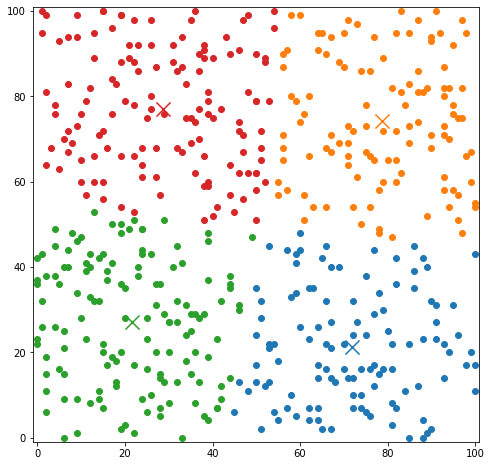

11

In [104]:
datas = [(randint(minimum_nound, maximun_bound), randint(minimum_nound, maximun_bound)) for _ in range(500)]


k_means = Kmeans()
k_means.start(4, datas)
k_means.times

In [97]:
k_means.cluster.values()

dict_values([[(73, 65), (73, 100), (71, 83), (55, 97), (82, 98), (93, 58), (94, 78), (51, 87), (59, 61), (60, 92), (82, 71), (64, 90), (52, 86), (90, 62), (69, 83), (87, 81), (52, 90), (57, 73), (72, 67), (52, 78), (91, 80), (75, 56), (56, 74), (84, 59), (99, 81), (75, 53), (61, 91), (87, 100), (79, 76), (80, 79), (65, 100), (53, 71), (83, 74), (91, 66), (51, 73), (92, 63), (96, 55), (93, 80), (66, 94), (96, 68), (96, 59), (87, 86), (55, 82), (88, 89), (65, 82), (74, 82), (79, 99), (66, 91), (67, 69), (94, 98), (90, 85), (53, 80), (67, 95), (74, 65), (54, 69), (98, 57), (81, 75), (64, 92), (62, 81), (79, 86), (52, 86), (71, 81), (90, 98), (53, 100), (59, 82), (75, 70), (94, 90), (99, 83), (91, 63), (95, 84), (98, 68), (94, 65), (70, 84), (94, 96), (68, 54), (60, 91), (82, 68), (71, 78), (73, 80), (77, 61), (71, 56), (66, 90), (76, 79), (98, 62), (89, 69), (81, 82), (54, 61), (82, 73), (67, 93), (54, 77), (81, 55), (50, 88), (76, 52), (74, 82), (66, 56), (92, 84), (73, 53), (95, 99), (9